## Importing Libraries

In [695]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier  
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import EditedNearestNeighbours
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours
from numpy import where
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score, f1_score, recall_score
from imblearn.under_sampling import AllKNN 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks

#### Utility functions

In [548]:

# The null values are represented by string na in data we need to convert that to numpy.Nan or Pd.nan for more clarity
def na_to_nan(data):
    data = data.replace("na", np.nan)
    return data

#function to create confusion metrix
def result_analysis(actual_labels, predicted_labels):
    cm=metrics.confusion_matrix(actual_labels,predicted_labels)
    plt.figure(figsize=(5,5))
    sn.heatmap(cm,annot=True,cbar=False, fmt='g')
    cm1 = pd.DataFrame(cm.reshape((1,4)), columns=['True_negatives', 'False_positives', 'False_negatives', 'True_positives'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    Total_Cost = 10*cm1.False_positives + 500*cm1.False_negatives
    plt.show()
    print(cm1)
    print("Cost is :", Total_Cost[0])
    prfs = precision_recall_fscore_support(actual_labels, predicted_labels)
    
    prec = prfs[0][1]
    recall = prfs[1][1]
    f1 = prfs[2][1]
    
    return Total_Cost[0], prec, recall, f1

## Reading training and testing dataset

In [3]:
#training data
df_train = pd.read_csv("./aps_failure_training_set.csv", skiprows=20)# the file contain some additional information about the data, so skipping that part to read the actual data from file
df_train.head()
#df_train = df_train.sample(1000)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
#testing data
df_test = pd.read_csv("./aps_failure_test_set.csv", skiprows=20)# the file contain some additional information about the data, so skipping that part to read the actual data from file
df_test.head()
#df_test = df_test.sample(1000)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


## Pre-processing and Analysis

In [5]:
#high level information on training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [6]:
#high level information on testing set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


neg    59000
pos     1000
Name: class, dtype: int64


<AxesSubplot:>

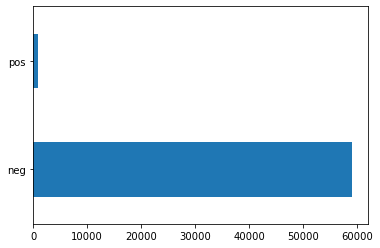

In [7]:
#Checking the distribution of classes in training data
print(df_train["class"].value_counts())
df_train["class"].value_counts().plot(kind='barh')

Dataset provided for the training is highly imabalanced

neg    15625
pos      375
Name: class, dtype: int64


<AxesSubplot:>

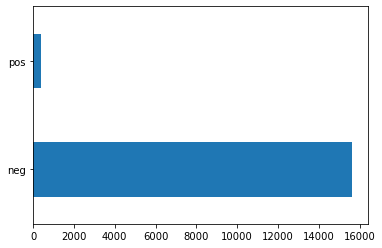

In [8]:
#Checking the distribution of classes in testing data
print(df_test["class"].value_counts())
df_test["class"].value_counts().plot(kind='barh')

In [9]:
#Checking the duplicate rows and presence of null values in training data
print("Total data :",len(df_train))
print("Total data without any null value in any rows :",len(df_train.dropna()))
print("Total data without any duplicate rows :",len(df_train.drop_duplicates()))

Total data : 60000
Total data without any null value in any rows : 60000
Total data without any duplicate rows : 60000


In [10]:
#replacing string value na with np.nan on training data
df_train = df_train.apply(lambda data: na_to_nan(data))
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [11]:
#replacing string value na with np.nan on testing data
df_test = df_test.apply(lambda data: na_to_nan(data))
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [12]:
print("Number of columns without any nan in training set", len(df_train.columns[df_train.notna().all()]))
print("Number of columns without any nan in testing set", len(df_test.columns[df_test.notna().all()]))

Number of columns without any nan in training set 2
Number of columns without any nan in testing set 2


In [13]:
#Checking the duplicate rows and presence of null values in training data
print("Total data :",len(df_train))
print("Total data without any null value in any rows :",len(df_train.dropna()))
print("Total data without any duplicate rows :",len(df_train.drop_duplicates()))

Total data : 60000
Total data without any null value in any rows : 591
Total data without any duplicate rows : 60000


In [14]:
#Checking the duplicate rows and presence of null values in testing data
print("Total data :",len(df_test))
print("Total data without any null value in any rows :",len(df_test.dropna()))
print("Total data without any duplicate rows :",len(df_test.drop_duplicates()))

Total data : 16000
Total data without any null value in any rows : 165
Total data without any duplicate rows : 16000


In [15]:
#Checking the percentage of presence of null data in each column
col_name = []
percentage = []
for each_column in df_train.columns:
    temp =df_train[each_column].isna().sum()
    per = temp/len(df_train)*100
    col_name.append(each_column)
    percentage.append(per)
    print(each_column,"=> total nan values : ", temp, " percentage of nan values : ", temp/len(df_train)*100)

class => total nan values :  0  percentage of nan values :  0.0
aa_000 => total nan values :  0  percentage of nan values :  0.0
ab_000 => total nan values :  46329  percentage of nan values :  77.215
ac_000 => total nan values :  3335  percentage of nan values :  5.558333333333334
ad_000 => total nan values :  14861  percentage of nan values :  24.768333333333334
ae_000 => total nan values :  2500  percentage of nan values :  4.166666666666666
af_000 => total nan values :  2500  percentage of nan values :  4.166666666666666
ag_000 => total nan values :  671  percentage of nan values :  1.1183333333333334
ag_001 => total nan values :  671  percentage of nan values :  1.1183333333333334
ag_002 => total nan values :  671  percentage of nan values :  1.1183333333333334
ag_003 => total nan values :  671  percentage of nan values :  1.1183333333333334
ag_004 => total nan values :  671  percentage of nan values :  1.1183333333333334
ag_005 => total nan values :  671  percentage of nan values

ed_000 => total nan values :  9553  percentage of nan values :  15.921666666666667
ee_000 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_001 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_002 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_003 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_004 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_005 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_006 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_007 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_008 => total nan values :  671  percentage of nan values :  1.1183333333333334
ee_009 => total nan values :  671  percentage of nan values :  1.1183333333333334
ef_000 => total nan values :  2724  percentage of nan values :  4.54
eg_000 => total nan values :

Text(0, 0.5, 'Percentage')

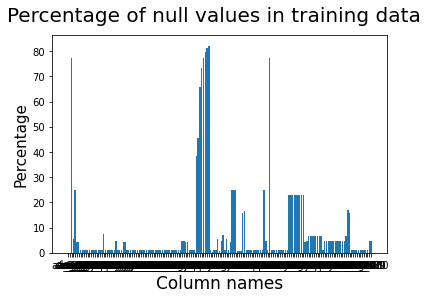

In [16]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (40,4)
plt.bar(col_name, percentage)
fig.suptitle('Percentage of null values in training data', fontsize=20)
plt.xlabel('Column names', fontsize=17)
plt.ylabel('Percentage', fontsize=15)

In [17]:
#Checking the columns which all are having presence of nan higher that 50%
columns_to_drop = []
for each_column in df_train.columns:
    temp =df_train[each_column].isna().sum()
    if temp/len(df_train)*100>50:
        print(each_column,"=> total nan values : ", temp, " percentage of nan values : ", temp/len(df_train)*100)
        columns_to_drop.append(each_column)

ab_000 => total nan values :  46329  percentage of nan values :  77.215
bm_000 => total nan values :  39549  percentage of nan values :  65.915
bn_000 => total nan values :  44009  percentage of nan values :  73.34833333333334
bo_000 => total nan values :  46333  percentage of nan values :  77.22166666666666
bp_000 => total nan values :  47740  percentage of nan values :  79.56666666666666
bq_000 => total nan values :  48722  percentage of nan values :  81.20333333333333
br_000 => total nan values :  49264  percentage of nan values :  82.10666666666665
cr_000 => total nan values :  46329  percentage of nan values :  77.215


In [18]:
#dropping the columns which all are having nan values greater than 50%
df_train = df_train.drop(columns_to_drop, 1)

#dropping the same columns from test data
df_test = df_test.drop(columns_to_drop, 1)

#new shape after dropping columns
df_train.shape, df_test.shape

((60000, 163), (16000, 163))

In [19]:
#Encoding the label class
df_train['class'] = df_train["class"].map({'neg':0, 'pos':1})
df_test['class'] = df_test["class"].map({'neg':0, 'pos':1})
df_train.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [20]:
#removing the class label from training dataset
training_labels = list(df_train['class'])
training_data = df_train.drop('class', axis=1)
training_data.head(2)

#removing the class label from tesing dataset
testing_labels = list(df_test['class'])
testing_data = df_test.drop('class', axis=1)
testing_data.head(2)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,20,12,0,0,0,0,0,2682,4736,...,1098,138,412,654,78,88,0,0,0,0
1,82,68,40,0,0,0,0,0,0,748,...,1068,276,1620,116,86,462,0,0,0,0


### Imputing the data with median

In [21]:
# Imputation : Filling the missing values in data with median
imputing_with_median = SimpleImputer(strategy='median')
imputing_with_median.fit(training_data.values)
imputed_training_data_with_median = imputing_with_median.transform(training_data.values) #training data 
imputed_testing_data_with_median = imputing_with_median.transform(testing_data.values) #testing data

In [22]:
#for noise experiments
#creating dataframe from the imputed matrix with labels
imputed_df_train_copy = pd.DataFrame(imputed_training_data_with_median, columns=training_data.columns)
imputed_df_train_copy['class'] = training_labels

imputed_df_test_copy = pd.DataFrame(imputed_testing_data_with_median, columns=training_data.columns)
imputed_df_test_copy['class'] = testing_labels

In [23]:
#creating dataframe from the imputed matrix
imputed_df_train = pd.DataFrame(imputed_training_data_with_median, columns=training_data.columns)
imputed_df_test = pd.DataFrame(imputed_testing_data_with_median, columns=testing_data.columns)

### Removing Correlated Features

In [24]:
#identifying the features which has high correlation and eliminate the features
co_matrix = imputed_df_train.corr().abs()
shp_ = co_matrix.shape

mn = np.ones(shp_)
top = co_matrix.where(np.triu(mn, k=1).astype(np.bool))
drop_features = [col for col in top.columns if any(top[col] > 0.90)]
print("features to drop from trainig and testing data :")
print(drop_features)

features to drop from trainig and testing data :
['am_0', 'an_000', 'ao_000', 'aq_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'bb_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bt_000', 'bu_000', 'bv_000', 'by_000', 'cc_000', 'cf_000', 'ci_000', 'cn_004', 'cn_005', 'co_000', 'cq_000', 'cs_005', 'dc_000', 'dn_000', 'dp_000', 'dt_000', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004']


In [25]:
#removing the features with high correlation from both train and test dataset
imputed_df_train.drop(drop_features, axis=1, inplace=True)
imputed_df_test.drop(drop_features, axis=1, inplace=True)

### Removing 0 Variance Features

In [26]:
imputed_df_train.drop(list(imputed_df_train.std()[imputed_df_train.std() == 0].keys()), axis = 1, inplace = True)
imputed_df_test.drop(list(imputed_df_test.std()[imputed_df_test.std() == 0].keys()), axis = 1, inplace = True)

### Normalize

In [27]:
nn = Normalizer()

normalised_df_train = nn.fit_transform(imputed_df_train)
normalised_df_test = nn.transform(imputed_df_test)

# <center> BASELINE </center>

In [28]:
model_list = []
training_f1_list = []
testing_f1_list = []

training_precision_list = []
testing_precision_list = []

training_recall_list = []
testing_recall_list = []

train_cost_list = []
test_cost_list = []

### KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(normalised_df_train, training_labels)

KNeighborsClassifier(n_jobs=-1)

In [30]:
model_list.append('KNN')

In [31]:
knn_train_pred = knn.predict(normalised_df_train)
knn_test_pred = knn.predict(normalised_df_test)

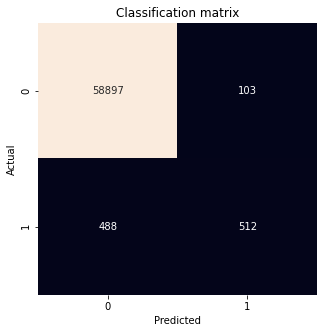

   True_negatives  False_positives  False_negatives  True_positives
0           58897              103              488             512
Cost is : 245030


In [32]:
knn_cost_train, prec_knn_train, rec_knn_train, f1_knn_train = result_analysis(training_labels, knn_train_pred)

In [33]:
training_f1_list.append(f1_knn_train)
training_precision_list.append(prec_knn_train)
training_recall_list.append(rec_knn_train)

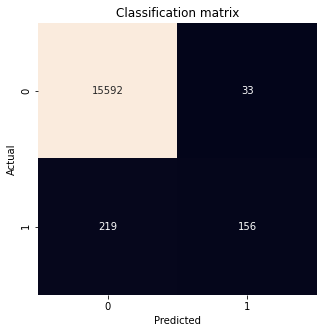

   True_negatives  False_positives  False_negatives  True_positives
0           15592               33              219             156
Cost is : 109830


In [34]:
knn_cost_test, prec_knn_test, rec_knn_test, f1_knn_test = result_analysis(testing_labels, knn_test_pred)

In [35]:
testing_f1_list.append(f1_knn_test)
testing_precision_list.append(prec_knn_test)
testing_recall_list.append(rec_knn_test)

In [234]:
train_cost_list.append(knn_cost_train)
test_cost_list.append(knn_cost_test)

### LR

In [36]:
lr = SGDClassifier(loss = 'log', n_jobs=-1)
lr.fit(normalised_df_train, training_labels)

SGDClassifier(loss='log', n_jobs=-1)

In [37]:
model_list.append('Logistic Regression')

In [38]:
lr_train_pred = lr.predict(normalised_df_train)
lr_test_pred = lr.predict(normalised_df_test)

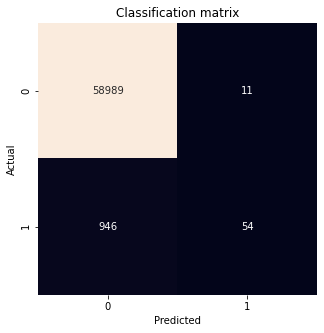

   True_negatives  False_positives  False_negatives  True_positives
0           58989               11              946              54
Cost is : 473110


In [39]:
lr_cost_train, prec_lr_train, rec_lr_train, f1_lr_train = result_analysis(training_labels, lr_train_pred)

In [40]:
training_f1_list.append(f1_lr_train)
training_precision_list.append(prec_lr_train)
training_recall_list.append(rec_lr_train)

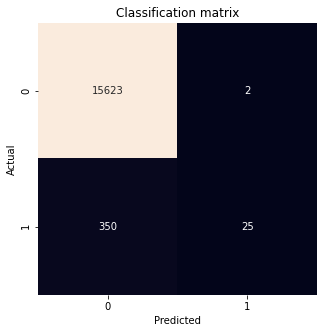

   True_negatives  False_positives  False_negatives  True_positives
0           15623                2              350              25
Cost is : 175020


In [41]:
lr_cost_test, prec_lr_test, rec_lr_test, f1_lr_test = result_analysis(testing_labels, lr_test_pred)

In [42]:
testing_f1_list.append(f1_lr_test)
testing_precision_list.append(prec_lr_test)
testing_recall_list.append(rec_lr_test)

In [235]:
train_cost_list.append(lr_cost_train)
test_cost_list.append(lr_cost_test)

### SVM

In [43]:
sv = SGDClassifier(loss = 'hinge', n_jobs=-1)
sv.fit(normalised_df_train, training_labels)

SGDClassifier(n_jobs=-1)

In [44]:
model_list.append('SVM')

In [45]:
sv_train_pred = sv.predict(normalised_df_train)
sv_test_pred = sv.predict(normalised_df_test)

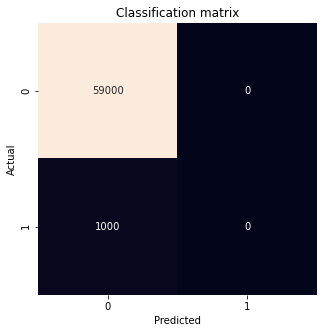

   True_negatives  False_positives  False_negatives  True_positives
0           59000                0             1000               0
Cost is : 500000


D:\Anaconda\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
sv_cost_train, prec_sv_train, rec_sv_train, f1_sv_train = result_analysis(training_labels, sv_train_pred)

In [47]:
training_f1_list.append(f1_sv_train)
training_precision_list.append(prec_sv_train)
training_recall_list.append(rec_sv_train)

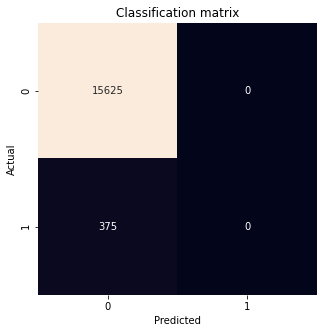

   True_negatives  False_positives  False_negatives  True_positives
0           15625                0              375               0
Cost is : 187500


D:\Anaconda\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
sv_cost_test, prec_sv_test, rec_sv_test, f1_sv_test = result_analysis(testing_labels, sv_test_pred)

In [49]:
testing_f1_list.append(f1_sv_test)
testing_precision_list.append(prec_sv_test)
testing_recall_list.append(rec_sv_test)

In [236]:
train_cost_list.append(sv_cost_train)
test_cost_list.append(sv_cost_test)

### Naive Bayes

In [50]:
nb = GaussianNB()
nb.fit(normalised_df_train, training_labels)

GaussianNB()

In [51]:
model_list.append('Naive Bayes')

In [52]:
nb_train_pred = nb.predict(normalised_df_train)
nb_test_pred = nb.predict(normalised_df_test)

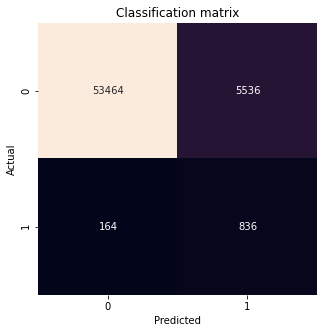

   True_negatives  False_positives  False_negatives  True_positives
0           53464             5536              164             836
Cost is : 137360


In [53]:
nb_cost_train, prec_nb_train, rec_nb_train, f1_nb_train = result_analysis(training_labels, nb_train_pred)

In [54]:
training_f1_list.append(f1_nb_train)
training_precision_list.append(prec_nb_train)
training_recall_list.append(rec_nb_train)

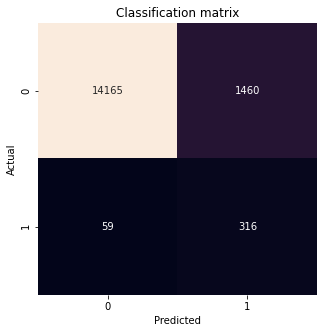

   True_negatives  False_positives  False_negatives  True_positives
0           14165             1460               59             316
Cost is : 44100


In [55]:
nb_cost_test, prec_nb_test, rec_nb_test, f1_nb_test = result_analysis(testing_labels, nb_test_pred)

In [56]:
testing_f1_list.append(f1_nb_test)
testing_precision_list.append(prec_nb_test)
testing_recall_list.append(rec_nb_test)

In [237]:
train_cost_list.append(nb_cost_train)
test_cost_list.append(nb_cost_test)

### Random Forest

In [246]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(normalised_df_train, training_labels)

RandomForestClassifier(n_jobs=-1)

In [58]:
model_list.append('Random Forest')

In [247]:
rf_train_pred = rf.predict(normalised_df_train)
rf_test_pred = rf.predict(normalised_df_test)

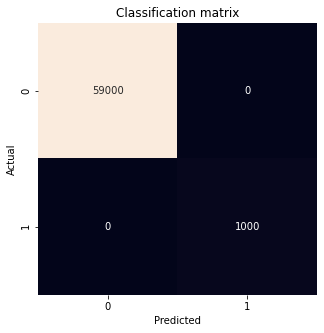

   True_negatives  False_positives  False_negatives  True_positives
0           59000                0                0            1000
Cost is : 0


In [248]:
rf_cost_train, prec_rf_train, rec_rf_train, f1_rf_train = result_analysis(training_labels, rf_train_pred)

In [249]:
training_f1_list.append(f1_rf_train)
training_precision_list.append(prec_rf_train)
training_recall_list.append(rec_rf_train)

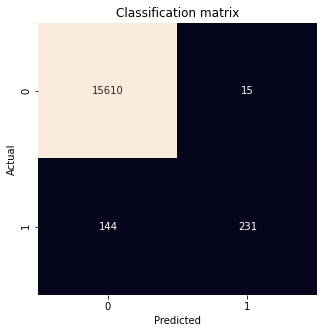

   True_negatives  False_positives  False_negatives  True_positives
0           15610               15              144             231
Cost is : 72150


In [250]:
rf_cost_test, prec_rf_test, rec_rf_test, f1_rf_test = result_analysis(testing_labels, rf_test_pred)

In [251]:
testing_f1_list.append(f1_rf_test)
testing_precision_list.append(prec_rf_test)
testing_recall_list.append(rec_rf_test)

In [252]:
train_cost_list.append(rf_cost_train)
test_cost_list.append(rf_cost_test)

In [253]:
baseline_models_train = pd.DataFrame()
baseline_models_test = pd.DataFrame()

In [254]:
baseline_models_train['Model'] = model_list
baseline_models_train['Precision'] = training_precision_list
baseline_models_train['Recall'] = training_recall_list
baseline_models_train['F1_Score'] = training_f1_list
baseline_models_train['Cost'] = train_cost_list

baseline_models_train

,Model,Precision,Recall,F1_Score,Cost
0,KNN,0.832520,0.512,0.634056,245030
1,Logistic Regression,0.830769,0.054,0.101408,473110
2,SVM,0.000000,0.000,0.000000,500000
3,Naive Bayes,0.131199,0.836,0.226804,137360
4,Random Forest,1.000000,1.000,1.000000,0


In [255]:
baseline_models_test['Model'] = model_list
baseline_models_test['Precision'] = testing_precision_list
baseline_models_test['Recall'] = testing_recall_list
baseline_models_test['F1_Score'] = testing_f1_list
baseline_models_test['Cost'] = test_cost_list

baseline_models_test

,Model,Precision,Recall,F1_Score,Cost
0,KNN,0.825397,0.416000,0.553191,109830
1,Logistic Regression,0.925926,0.066667,0.124378,175020
2,SVM,0.000000,0.000000,0.000000,187500
3,Naive Bayes,0.177928,0.842667,0.293817,44100
4,Random Forest,0.939024,0.616000,0.743961,72150


# <center> SMOTE </center>

In [156]:
#Performing over sampling using smote
smote_obj = SMOTE(random_state=42)
#on actual data
x_train_new, y_train_new = smote_obj.fit_resample(normalised_df_train, training_labels)

In [157]:
#converting oversampled data to a dataframe
smote_train_df = pd.DataFrame(x_train_new, columns=imputed_df_train.columns)

In [158]:
normalised_df_test = pd.DataFrame(normalised_df_test, columns=imputed_df_test.columns)

In [159]:
#checking the shape of train and test data
smote_train_df.shape, normalised_df_test.shape

((118000, 124), (16000, 124))

In [160]:
#after smotting updating the class labels for training
training_labels_smote = y_train_new

## Training and Comparison of multiple classification models

# <center> Random Forest </center>

In [549]:
model_list_smote = []

training_f1_list_smote = []
testing_f1_list_smote = []

training_precision_list_smote = []
testing_precision_list_smote = []

training_recall_list_smote = []
testing_recall_list_smote = []

cost_list_smote = []

#### Training with Random forest classifier

In [550]:
rf = RandomForestClassifier(n_estimators=600, min_samples_split=10, min_samples_leaf=3, n_jobs = -1, random_state = 4213)
rf.fit(smote_train_df, training_labels_smote)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10,
                       n_estimators=600, n_jobs=-1, random_state=4213)

In [551]:
rf_train_pred = rf.predict_proba(smote_train_df)
rf_test_pred = rf.predict_proba(normalised_df_test)

In [552]:
test_labels = []

for i, j in rf_test_pred:
    
    if i > 0.85:
        test_labels.append(0)
    else:
        test_labels.append(1)

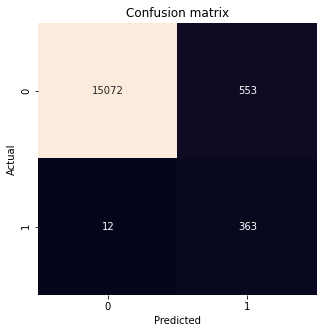

   True_negatives  False_positives  False_negatives  True_positives
0           15072              553               12             363
Cost is : 11530


In [553]:
rf_cost_test_smote, prec_rf_test_smote, rec_rf_test_smote, f1_rf_test_smote = result_analysis(testing_labels, test_labels)

In [554]:
prec_rf_test_smote, f1_rf_test_smote, rec_rf_test_smote

(0.3962882096069869, 0.5623547637490317, 0.968)

In [228]:
# #fine tuning Random forest classifier

# grid_items = { 'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000]}

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_items, 
#                                cv = 3, verbose=2, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(smote_train_df, training_labels_smote)
# rf_random.best_params_

## <center>Adding Instance Noise</center>
### Fixed data variable and different noise range

In [593]:
noise_percent = ['1%', '5%', '10%', '15%', '20%']

In [594]:
n1_precision_list_noise = []
n1_recall_list_noise = []
n1_cost_list_noise = []

In [595]:
def add_noise(features, labels, noise_amount, normal_noise = 10):
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels, test_size=noise_amount,
                                                        random_state = 42)
    
    np.random.seed(seed = 42)
    noise = np.random.normal(0, normal_noise, X_test.shape)
    
    X_test_noise = X_test + noise
    
    noise_data = pd.concat([X_train, X_test_noise])
    
    labels = y_train + y_test
    
    return noise_data, labels

In [596]:
def train_rf_model(train, train_lab, test, test_lab, threshold = 0.85):
    
    rf = RandomForestClassifier(n_estimators=600, min_samples_split=10, min_samples_leaf=3, n_jobs = -1, random_state = 4213)
    rf.fit(train, train_lab)
    
    rf_train_pred = rf.predict_proba(train)
    rf_test_pred = rf.predict_proba(test)
    
    test_labels = []

    for i, j in rf_test_pred:

        if i > threshold:
            test_labels.append(0)
        else:
            test_labels.append(1)

    #result_analysis(testing_labels, test_labels)
    
    return result_analysis(testing_labels, test_labels)

### Adding Noise to 1% data

In [597]:
imputed_df_train_noise_1, train_labels_1 = add_noise(imputed_df_train, training_labels, 0.01)

In [598]:
nn = Normalizer()

normalised_df_train_noise1 = nn.fit_transform(imputed_df_train_noise_1)
normalised_df_test_noise1 = nn.transform(imputed_df_test)

In [599]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise1, train_smote_labels1 = smote_obj.fit_resample(normalised_df_train_noise1, train_labels_1)

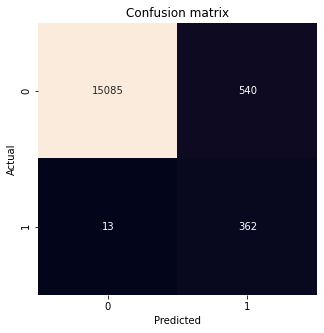

   True_negatives  False_positives  False_negatives  True_positives
0           15085              540               13             362
Cost is : 11900


In [600]:
rf_cost_test_noise1, prec_rf_test_noise1, rec_rf_test_noise1, f1_rf_test_noise1 = train_rf_model(train_smote_noise1,
                                                                                    train_smote_labels1, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [601]:
n1_precision_list_noise.append(rf_cost_test_noise1)
n1_recall_list_noise.append(rec_rf_test_noise1)
n1_cost_list_noise.append(prec_rf_test_noise1)

### Adding Noise to 5% data

In [602]:
imputed_df_train_noise_5, train_labels_5 = add_noise(imputed_df_train, training_labels, 0.05)

In [603]:
nn = Normalizer()

normalised_df_train_noise5 = nn.fit_transform(imputed_df_train_noise_5)
normalised_df_test_noise5 = nn.transform(imputed_df_test)

In [604]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise5, train_smote_labels5 = smote_obj.fit_resample(normalised_df_train_noise5, train_labels_5)

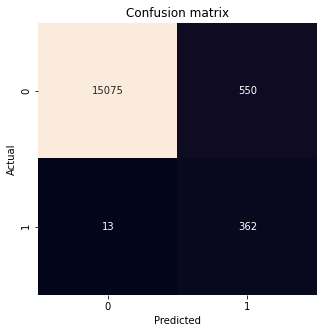

   True_negatives  False_positives  False_negatives  True_positives
0           15075              550               13             362
Cost is : 12000


In [605]:
rf_cost_test_noise5, prec_rf_test_noise5, rec_rf_test_noise5, f1_rf_test_noise5 = train_rf_model(train_smote_noise5,
                                                                                    train_smote_labels5, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [606]:
n1_precision_list_noise.append(rf_cost_test_noise5)
n1_recall_list_noise.append(rec_rf_test_noise5)
n1_cost_list_noise.append(prec_rf_test_noise5)

### Adding Noise to 10% data

In [607]:
imputed_df_train_noise_10, train_labels_10 = add_noise(imputed_df_train, training_labels, 0.1)

In [608]:
nn = Normalizer()

normalised_df_train_noise10 = nn.fit_transform(imputed_df_train_noise_10)
normalised_df_test_noise10 = nn.transform(imputed_df_test)

In [609]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise10, train_smote_labels10 = smote_obj.fit_resample(normalised_df_train_noise10, train_labels_10)

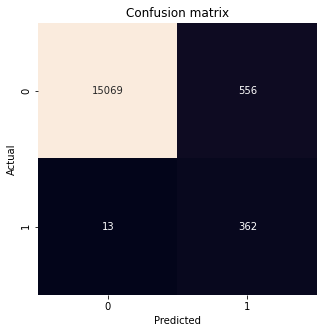

   True_negatives  False_positives  False_negatives  True_positives
0           15069              556               13             362
Cost is : 12060


In [610]:
rf_cost_test_noise10, prec_rf_test_noise10, rec_rf_test_noise10, f1_rf_test_noise10 = train_rf_model(train_smote_noise10,
                                                                                    train_smote_labels10, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [611]:
n1_precision_list_noise.append(rf_cost_test_noise10)
n1_recall_list_noise.append(rec_rf_test_noise10)
n1_cost_list_noise.append(prec_rf_test_noise10)

### Adding Noise to 15% data

In [612]:
imputed_df_train_noise_15, train_labels_15 = add_noise(imputed_df_train, training_labels, 0.1)

In [613]:
nn = Normalizer()

normalised_df_train_noise15 = nn.fit_transform(imputed_df_train_noise_15)
normalised_df_test_noise15 = nn.transform(imputed_df_test)

In [614]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise15, train_smote_labels15 = smote_obj.fit_resample(normalised_df_train_noise15, train_labels_15)

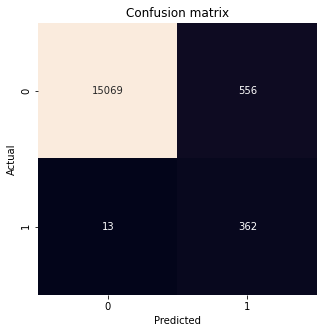

   True_negatives  False_positives  False_negatives  True_positives
0           15069              556               13             362
Cost is : 12060


In [615]:
rf_cost_test_noise15, prec_rf_test_noise15, rec_rf_test_noise15, f1_rf_test_noise15 = train_rf_model(train_smote_noise15,
                                                                                    train_smote_labels15, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [616]:
n1_precision_list_noise.append(rf_cost_test_noise15)
n1_recall_list_noise.append(rec_rf_test_noise15)
n1_cost_list_noise.append(prec_rf_test_noise15)

### Adding Noise to 20% data

In [617]:
imputed_df_train_noise_20, train_labels_20 = add_noise(imputed_df_train, training_labels, 0.2)

In [618]:
nn = Normalizer()

normalised_df_train_noise20 = nn.fit_transform(imputed_df_train_noise_20)
normalised_df_test_noise20 = nn.transform(imputed_df_test)

In [619]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise20, train_smote_labels20 = smote_obj.fit_resample(normalised_df_train_noise20, train_labels_20)

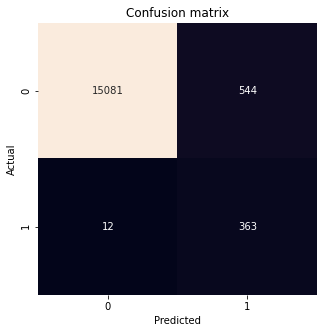

   True_negatives  False_positives  False_negatives  True_positives
0           15081              544               12             363
Cost is : 11440


In [620]:
rf_cost_test_noise20, prec_rf_test_noise20, rec_rf_test_noise20, f1_rf_test_noise20 = train_rf_model(train_smote_noise20,
                                                                                    train_smote_labels20, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [621]:
n1_precision_list_noise.append(rf_cost_test_noise20)
n1_recall_list_noise.append(rec_rf_test_noise20)
n1_cost_list_noise.append(prec_rf_test_noise20)

In [622]:
noise_smote_result_df = pd.DataFrame()
noise_smote_result_df['Noise Percent'] = noise_percent
noise_smote_result_df['Recall'] = n1_recall_list_noise
noise_smote_result_df['Cost'] = n1_precision_list_noise

noise_smote_result_df

,Noise Percent,Recall,Cost
0,1%,0.965333,11900
1,5%,0.965333,12000
2,10%,0.965333,12060
3,15%,0.965333,12060
4,20%,0.968000,11440


## <center> Changing Noise Values</center>

In [438]:
noise_percent = [2,7,12,17]

n1_precision_list_noise = []
n1_recall_list_noise = []
n1_cost_list_noise = []

### Adding Norm Noise 2

In [439]:
imputed_df_train_noise_1, train_labels_1 = add_noise(imputed_df_train, training_labels, 0.15, 2)

In [440]:
nn = Normalizer()

normalised_df_train_noise1 = nn.fit_transform(imputed_df_train_noise_1)
normalised_df_test_noise1 = nn.transform(imputed_df_test)

In [441]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise1, train_smote_labels1 = smote_obj.fit_resample(normalised_df_train_noise1, train_labels_1)

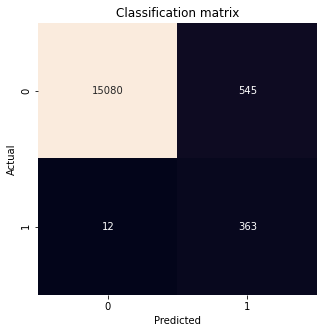

   True_negatives  False_positives  False_negatives  True_positives
0           15080              545               12             363
Cost is : 11450


In [442]:
rf_cost_test_noise1, prec_rf_test_noise1, rec_rf_test_noise1, f1_rf_test_noise1 = train_rf_model(train_smote_noise1,
                                                                                    train_smote_labels1, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [443]:
n1_precision_list_noise.append(rf_cost_test_noise1)
n1_recall_list_noise.append(rec_rf_test_noise1)
n1_cost_list_noise.append(prec_rf_test_noise1)

### Adding Norm Noise 7

In [444]:
imputed_df_train_noise_5, train_labels_5 = add_noise(imputed_df_train, training_labels, 0.15, 7)

In [445]:
nn = Normalizer()

normalised_df_train_noise5 = nn.fit_transform(imputed_df_train_noise_5)
normalised_df_test_noise5 = nn.transform(imputed_df_test)

In [446]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise5, train_smote_labels5 = smote_obj.fit_resample(normalised_df_train_noise5, train_labels_5)

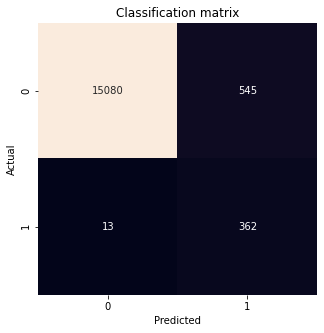

   True_negatives  False_positives  False_negatives  True_positives
0           15080              545               13             362
Cost is : 11950


In [447]:
rf_cost_test_noise5, prec_rf_test_noise5, rec_rf_test_noise5, f1_rf_test_noise5 = train_rf_model(train_smote_noise5,
                                                                                    train_smote_labels5, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [448]:
n1_precision_list_noise.append(rf_cost_test_noise5)
n1_recall_list_noise.append(rec_rf_test_noise5)
n1_cost_list_noise.append(prec_rf_test_noise5)

### Adding Norm Noise 12

In [449]:
imputed_df_train_noise_10, train_labels_10 = add_noise(imputed_df_train, training_labels, 0.15, 12)

In [450]:
nn = Normalizer()

normalised_df_train_noise10 = nn.fit_transform(imputed_df_train_noise_10)
normalised_df_test_noise10 = nn.transform(imputed_df_test)

In [451]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise10, train_smote_labels10 = smote_obj.fit_resample(normalised_df_train_noise10, train_labels_10)

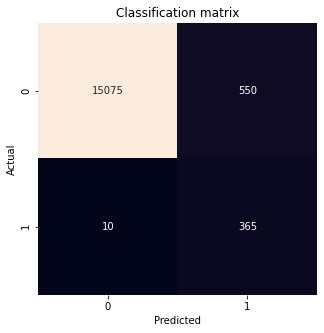

   True_negatives  False_positives  False_negatives  True_positives
0           15075              550               10             365
Cost is : 10500


In [452]:
rf_cost_test_noise10, prec_rf_test_noise10, rec_rf_test_noise10, f1_rf_test_noise10 = train_rf_model(train_smote_noise10,
                                                                                    train_smote_labels10, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [453]:
n1_precision_list_noise.append(rf_cost_test_noise10)
n1_recall_list_noise.append(rec_rf_test_noise10)
n1_cost_list_noise.append(prec_rf_test_noise10)

### Adding Norm Noise 17

In [454]:
imputed_df_train_noise_15, train_labels_15 = add_noise(imputed_df_train, training_labels, 0.15, 17)

In [455]:
nn = Normalizer()

normalised_df_train_noise15 = nn.fit_transform(imputed_df_train_noise_15)
normalised_df_test_noise15 = nn.transform(imputed_df_test)

In [456]:
smote_obj2 = SMOTE(random_state=42)

train_smote_noise15, train_smote_labels15 = smote_obj.fit_resample(normalised_df_train_noise15, train_labels_15)

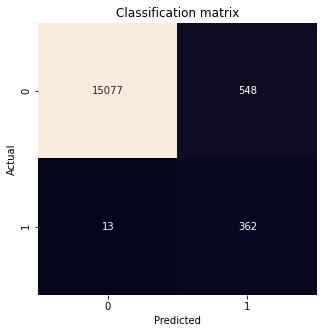

   True_negatives  False_positives  False_negatives  True_positives
0           15077              548               13             362
Cost is : 11980


In [457]:
rf_cost_test_noise15, prec_rf_test_noise15, rec_rf_test_noise15, f1_rf_test_noise15 = train_rf_model(train_smote_noise15,
                                                                                    train_smote_labels15, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [458]:
n1_precision_list_noise.append(rf_cost_test_noise15)
n1_recall_list_noise.append(rec_rf_test_noise15)
n1_cost_list_noise.append(prec_rf_test_noise15)

In [461]:
noise_smote_result_df2 = pd.DataFrame()
noise_smote_result_df2['Noise Percent'] = [15,15,15,15]
noise_smote_result_df2['Normal Noise Upper Range'] = noise_percent
noise_smote_result_df2['Recall'] = n1_recall_list_noise
noise_smote_result_df2['Cost'] = n1_precision_list_noise

noise_smote_result_df2

,Noise Percent,Normal Noise Upper Range,Recall,Cost
0,15,2,0.968000,11450
1,15,7,0.965333,11950
2,15,12,0.973333,10500
3,15,17,0.965333,11980


## SMOTE + ENN on 15% noise added data and noise values in the range (0,17)

In [545]:
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors= 7)
# transform the dataset
train_sm_enn_noise15, train_sm_enn_labels_noise15 = undersample.fit_resample(train_smote_noise15, train_smote_labels15)

In [546]:
def train_rf_model_sm_enn_attnoise(train, train_lab, test, test_lab, threshold = 0.85):
    
    rf = RandomForestClassifier(n_estimators=600, min_samples_split=10, min_samples_leaf=3, n_jobs = -1, random_state = 4213)
    rf.fit(train, train_lab)
    
    rf_train_pred = rf.predict_proba(train)
    rf_test_pred = rf.predict_proba(test)
    
    test_labels = []

    for i, j in rf_test_pred:

        if i > threshold:
            test_labels.append(0)
        else:
            test_labels.append(1)

    #result_analysis(testing_labels, test_labels)
    
    return result_analysis(testing_labels, test_labels)

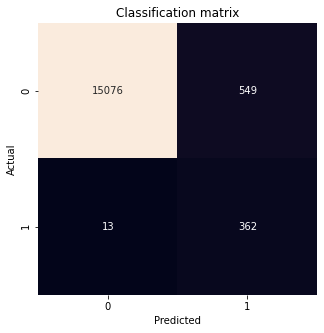

   True_negatives  False_positives  False_negatives  True_positives
0           15076              549               13             362
Cost is : 11990


In [547]:
c, p, r, f = train_rf_model_sm_enn_attnoise(train_sm_enn_noise15, train_sm_enn_labels_noise15, normalised_df_test, testing_labels)

### Adding Class Noise

In [475]:
def add_class_noise(features, labels, noise_percentage):
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels, test_size=noise_percentage,
                                                        random_state = 42)
    for i in range(len(y_test)):
        
        if y_test[i] == 0:
            y_test[i] = 1
        else:
            y_test[i] = 0
        
    data = pd.concat([X_train, X_test])
    
    labels = y_train + y_test
    
    return data, labels

### 1 percent Class Noise

In [483]:
imputed_df_train_cla_noise_1, train_labels_1 = add_class_noise(imputed_df_train, training_labels, 0.01)

In [484]:
nn = Normalizer()

normalised_df_train_cla_noise1 = nn.fit_transform(imputed_df_train_cla_noise_1)
normalised_df_test_cla_noise1 = nn.transform(imputed_df_test)

In [485]:
smote_obj2 = SMOTE(random_state=42)

train_smote_cla_noise1, train_smote_cla_labels1 = smote_obj.fit_resample(normalised_df_train_cla_noise1, train_labels_1)

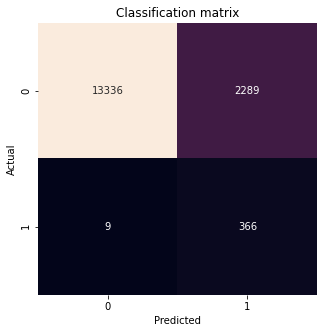

   True_negatives  False_positives  False_negatives  True_positives
0           13336             2289                9             366
Cost is : 27390


In [486]:
rf_cost_test_cla_noise1, prec_rf_test_cla_noise1, rec_rf_test_cla_noise1, f1_rf_test_cla_noise1 = train_rf_model(train_smote_cla_noise1,
                                                                                    train_smote_cla_labels1, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [488]:
rf_cost_test_cla_noise1, prec_rf_test_cla_noise1, rec_rf_test_cla_noise1, f1_rf_test_cla_noise1

(27390, 0.13785310734463277, 0.976, 0.24158415841584158)

## SMOTE + ENN on 1% Class Noise

In [490]:
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors=7)
# transform the dataset
train_sm_enn_cla_noise1, train_sm_enn_labels_cla_noise1 = undersample.fit_resample(train_smote_cla_noise1, train_smote_cla_labels1)

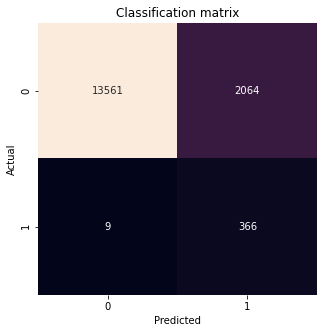

   True_negatives  False_positives  False_negatives  True_positives
0           13561             2064                9             366
Cost is : 25140


In [491]:
c, p, r, f = train_rf_model(train_sm_enn_cla_noise1, train_sm_enn_labels_cla_noise1, normalised_df_test, testing_labels)

### 0.5 percent Class Noise

In [623]:
imputed_df_train_cla_noise_05, train_labels_05 = add_class_noise(imputed_df_train, training_labels, 0.005)

In [624]:
nn = Normalizer()

normalised_df_train_cla_noise05 = nn.fit_transform(imputed_df_train_cla_noise_05)
normalised_df_test_cla_noise05 = nn.transform(imputed_df_test)

In [625]:
smote_obj2 = SMOTE(random_state=42)

train_smote_cla_noise05, train_smote_cla_labels05 = smote_obj.fit_resample(normalised_df_train_cla_noise05, train_labels_05)

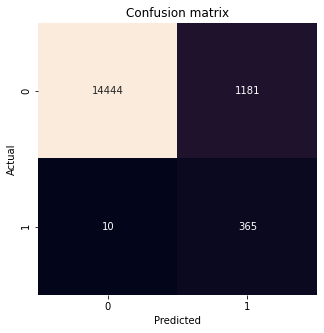

   True_negatives  False_positives  False_negatives  True_positives
0           14444             1181               10             365
Cost is : 16810


In [626]:
rf_cost_test_cla_noise05, prec_rf_test_cla_noise05, rec_rf_test_cla_noise05, f1_rf_test_cla_noise05 = train_rf_model(train_smote_cla_noise05,
                                                                                    train_smote_cla_labels05, normalised_df_test,
                                                                                         testing_labels, threshold=0.85)

In [627]:
rf_cost_test_cla_noise05, prec_rf_test_cla_noise05, rec_rf_test_cla_noise05, f1_rf_test_cla_noise05

(16810, 0.23609314359637776, 0.9733333333333334, 0.3800104112441437)

## SMOTE + ENN on 0.5% Class Noise

In [635]:
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors= 7)
# transform the dataset
train_sm_enn_cla_noise05, train_sm_enn_labels_cla_noise05 = undersample.fit_resample(train_smote_cla_noise05, train_smote_cla_labels05)

In [636]:
def train_rf_model_smote_enn(train, train_lab, test, test_lab, threshold = 0.85):
    
    rf = RandomForestClassifier(n_estimators= 2400, min_samples_split=10, min_samples_leaf=3, n_jobs = -1, random_state = 4213)
    rf.fit(train, train_lab)
    
    rf_train_pred = rf.predict_proba(train)
    rf_test_pred = rf.predict_proba(test)
    
    test_labels = []

    for i, j in rf_test_pred:

        if i > threshold:
            test_labels.append(0)
        else:
            test_labels.append(1)

    #result_analysis(testing_labels, test_labels)
    
    return result_analysis(testing_labels, test_labels)

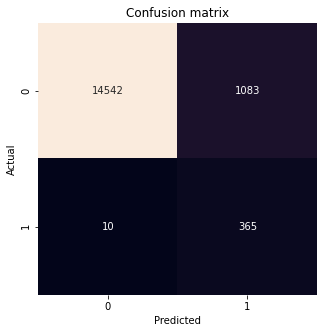

   True_negatives  False_positives  False_negatives  True_positives
0           14542             1083               10             365
Cost is : 15830


In [637]:
c, p, r, f = train_rf_model_smote_enn(train_sm_enn_cla_noise05, train_sm_enn_labels_cla_noise05, normalised_df_test, testing_labels)

In [634]:
rf_cost_test_cla_noise05, prec_rf_test_cla_noise05, rec_rf_test_cla_noise05, f1_rf_test_cla_noise05

(16810, 0.23609314359637776, 0.9733333333333334, 0.3800104112441437)

# SMOTE + ENN Normal Data

In [652]:
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors= 5)
# transform the dataset
train_sm_enn_nonoise, train_sm_enn_labels_nonoise = undersample.fit_resample(smote_train_df, training_labels_smote)

In [673]:
def train_rf_model_smote_enn(train, train_lab, test, test_lab, threshold = 0.85):
    
    rf = RandomForestClassifier(n_estimators= 700, min_samples_split= 7, min_samples_leaf= 2, n_jobs = -1, random_state = 4213)
    rf.fit(train, train_lab)
    
    rf_train_pred = rf.predict_proba(train)
    rf_test_pred = rf.predict_proba(test)
    
    test_labels = []

    for i, j in rf_test_pred:

        if i > threshold:
            test_labels.append(0)
        else:
            test_labels.append(1)

    #result_analysis(testing_labels, test_labels)
    
    return result_analysis(testing_labels, test_labels)

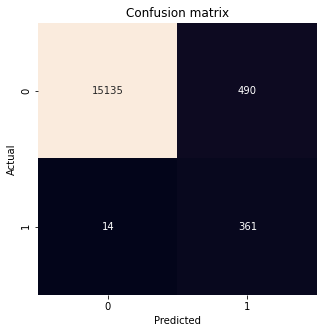

   True_negatives  False_positives  False_negatives  True_positives
0           15135              490               14             361
Cost is : 11900


In [674]:
c, p, r, f = train_rf_model_smote_enn(train_sm_enn_nonoise, train_sm_enn_labels_nonoise, normalised_df_test, testing_labels)

# SMOTE + ALLKNN 0.5% Noise

In [697]:
# define the undersampling method
allknn = AllKNN(n_neighbors= 5, n_jobs=-1)
# transform the dataset
train_sm_allknn_noise, train_sm_allknn_labels_noise = allknn.fit_resample(train_smote_cla_noise05, train_smote_cla_labels05)

In [698]:
def train_rf_model_smote_allknn(train, train_lab, test, test_lab, threshold = 0.85):
    
    rf = RandomForestClassifier(n_estimators= 2000, min_samples_split= 7, min_samples_leaf= 2, n_jobs = -1, random_state = 4213)
    rf.fit(train, train_lab)
    
    rf_train_pred = rf.predict_proba(train)
    rf_test_pred = rf.predict_proba(test)
    
    test_labels = []

    for i, j in rf_test_pred:

        if i > threshold:
            test_labels.append(0)
        else:
            test_labels.append(1)

    #result_analysis(testing_labels, test_labels)
    
    return result_analysis(testing_labels, test_labels)

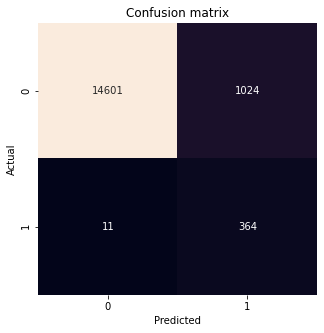

   True_negatives  False_positives  False_negatives  True_positives
0           14601             1024               11             364
Cost is : 15740


In [699]:
c, p, r, f = train_rf_model_smote_allknn(train_sm_allknn_noise, train_sm_allknn_labels_noise, normalised_df_test, testing_labels)